# Setup workspace, load data, and calculate needed variables

### Import packages and setup options/directories

In [1]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import datetime
import geopandas as gpd
from glob import glob
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import regionmask
#from reverse_colormap import reverse_colormap # in python dir
import scipy.stats as stats
from scipy import interpolate as spinterpolate
from shapely.geometry import Polygon
import warnings
import xarray as xr

In [2]:
%matplotlib inline

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# - See what dir we're in
os.getcwd()

'/opt/skipjack-bigeye-separation/python/bet_skj_separation_paper_v1'

In [5]:
# - Set data path
dpath = '/opt/skipjack-bigeye-separation/data/'

In [6]:
# - Set saved out figure path
figpath = '/opt/skipjack-bigeye-separation/python/bet_skj_separation_paper_v1/figures/'

### Define fxns

In [7]:
%run helper_notebooks/bet_skj_sep_fxns.ipynb

### Load WCPFC and ENSO time series data

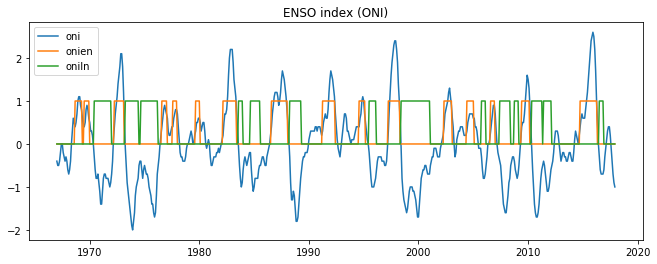

In [8]:
%run helper_notebooks/wcpfc_enso_load_and_calc.ipynb

### Compute temporal correlations btwn BET and BET:SKJ vs. SKJ CPUE

In [9]:
%run helper_notebooks/compute_bet_b2s_vs_skj.ipynb

### Create EEZ map mask

In [10]:
%run helper_notebooks/create_eez_mask_map.ipynb

### Load oceanographic data

In [11]:
%run helper_notebooks/load_env_vars.ipynb

### Put all CPUE and env vars into one xr dataset for ease of use by following calculations

In [12]:
dsallvars = bettoskj_cp_tot.to_dataset(name='bettoskj_cp_tot')
dsallvars['skj_cp_tot'] = skj_cp_tot
dsallvars['bet_cp_tot'] = bet_cp_tot
dsallvars['sst'] = sst
dsallvars['temp100'] = temp100
dsallvars['tcd'] = tcd
dsallvars['sss'] = sss
dsallvars['o2100'] = o2100
dsallvars['po2100'] = po2100
dsallvars['thd'] = thd
dsallvars['logchl'] = logchl
dsallvars['mld'] = mld
dsallvars['ssha'] = ssha
dsallvars['oni'] = oni
dfallvars = dsallvars.to_dataframe()
dfallvars.drop(columns=['depth'], inplace=True)
dfallvars.reset_index(inplace=True)
# - Keep only rows where skj_cp_tot, bet_cp_tot,
# and bettoskj_cp_tot are all non-nan
# --> dfallvars_nn = dfallvars, no nans for skj, bet, bettoskj
dfallvars_nn = dfallvars.dropna(subset=['skj_cp_tot',
    'bet_cp_tot','bettoskj_cp_tot'], how='any')

### Compute quotient analyses for SKJ and BET CPUE vs. environmental conditions

In [13]:
%run helper_notebooks/compute_qa_bet_skj_cpue.ipynb

### Compute temporal correlations btwn SKJ, BET, BET:SKJ CPUE vs. environmental conditions

In [14]:
%run helper_notebooks/compute_bet_skj_b2s_vs_env.ipynb

# Plot figures

### Supplementary Figure 2

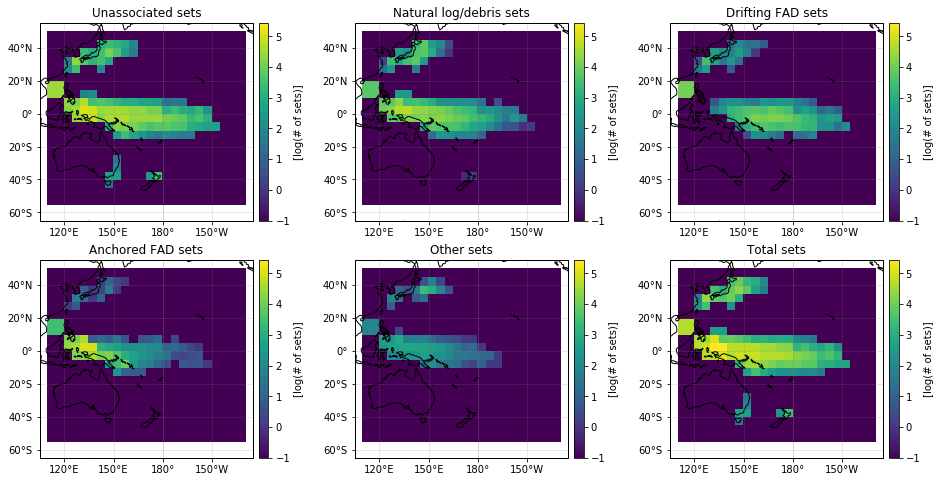

In [15]:
%run figure_notebooks/suppfig2.ipynb

### Supplementary Figure 3

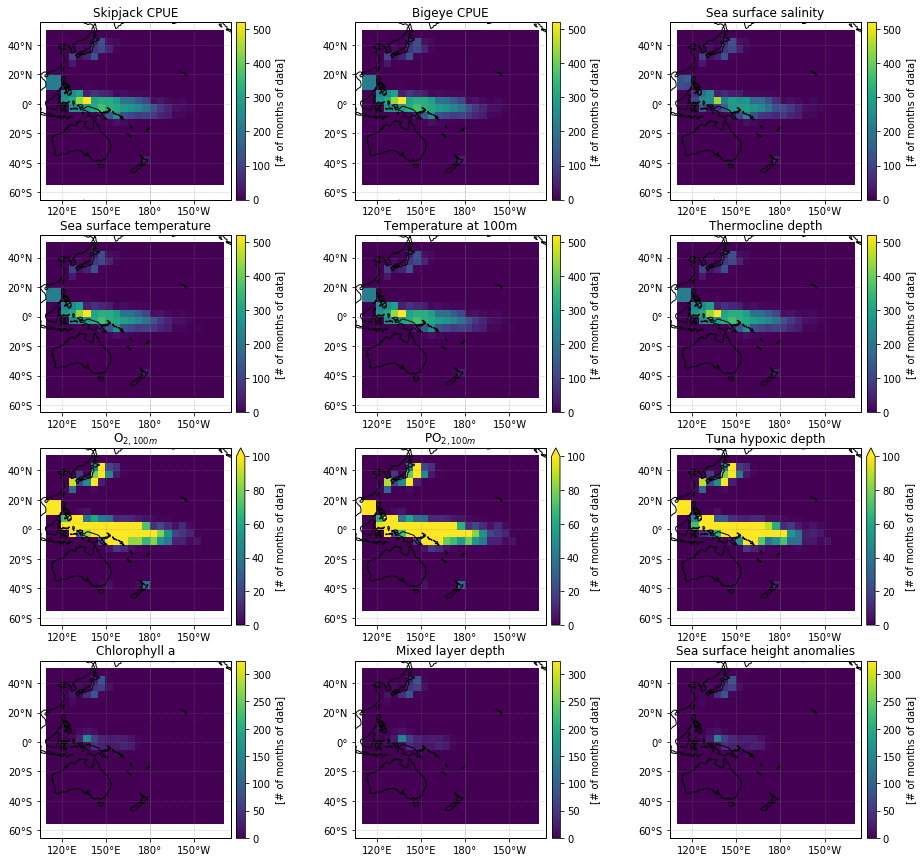

# of monthly mean data pts overlapping w/ skj_cp_tot:
lat: 10973
time: 10973
bettoskj_cp_tot: 10855
skj_cp_tot: 10973
bet_cp_tot: 10973
sst: 8187
temp100: 8375
tcd: 8003
sss: 6234
o2100: 1057
po2100: 1010
thd: 1010
logchl: 7177
mld: 8103
ssha: 8631
oni: 10973
# of monthly mean data pts overlapping w/ bet_cp_tot:
lat: 10973
lon: 10973
bettoskj_cp_tot: 10855
skj_cp_tot: 10973
bet_cp_tot: 10973
sst: 8187
temp100: 8375
tcd: 8003
sss: 6234
o2100: 1057
po2100: 1010
thd: 1010
logchl: 7177
mld: 8103
ssha: 8631
oni: 10973
# of monthly mean data pts overlapping w/ bettoskj_cp_tot:
lon: 10855
time: 10855
bettoskj_cp_tot: 10855
skj_cp_tot: 10855
bet_cp_tot: 10855
sst: 8070
temp100: 8258
tcd: 7886
sss: 6121
o2100: 1031
po2100: 984
thd: 984
logchl: 7080
mld: 7990
ssha: 8518
oni: 10855


In [16]:
%run figure_notebooks/suppfig3.ipynb

### Figure 1

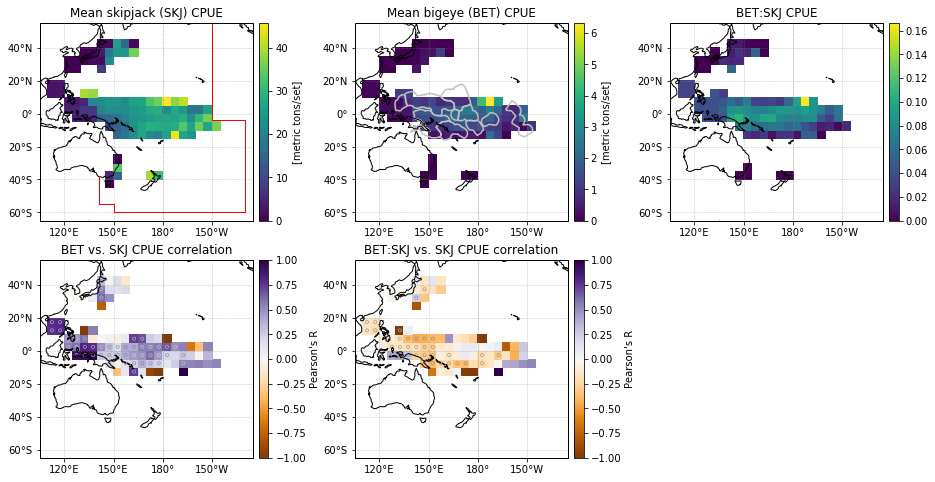

In [17]:
%run figure_notebooks/fig1.ipynb

### Figure 2

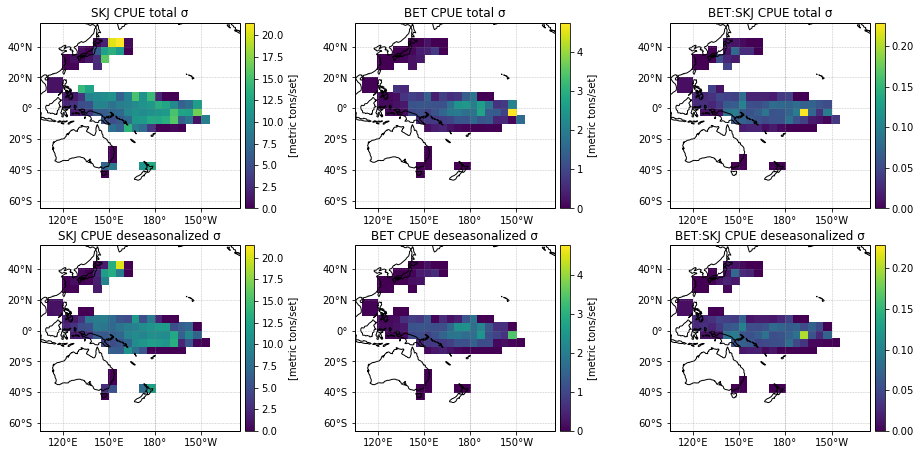

In [18]:
%run figure_notebooks/fig2.ipynb

### Figure 3

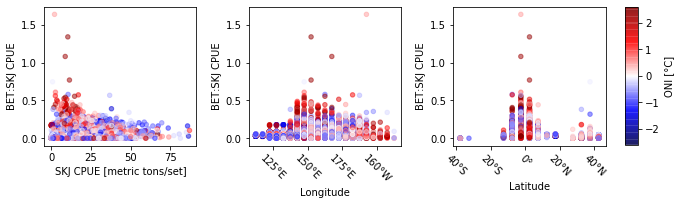

In [19]:
%run figure_notebooks/fig3.ipynb

### Figure 4

In [20]:
%run figure_notebooks/fig4.ipynb

SyntaxError: invalid syntax (<ipython-input-20-d594cee20d50>, line 5)

### Figure 5

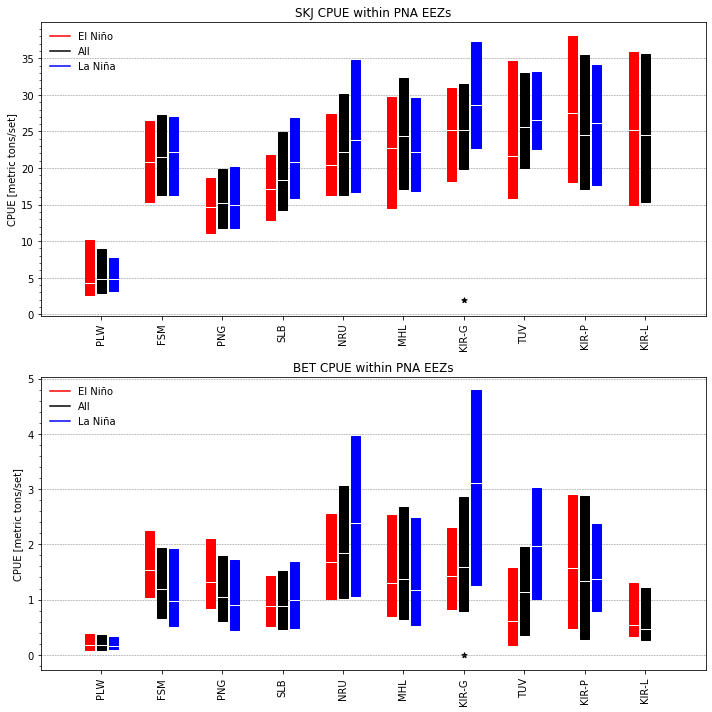

In [21]:
%run figure_notebooks/fig5.ipynb

### Supplementary Figures 4-5

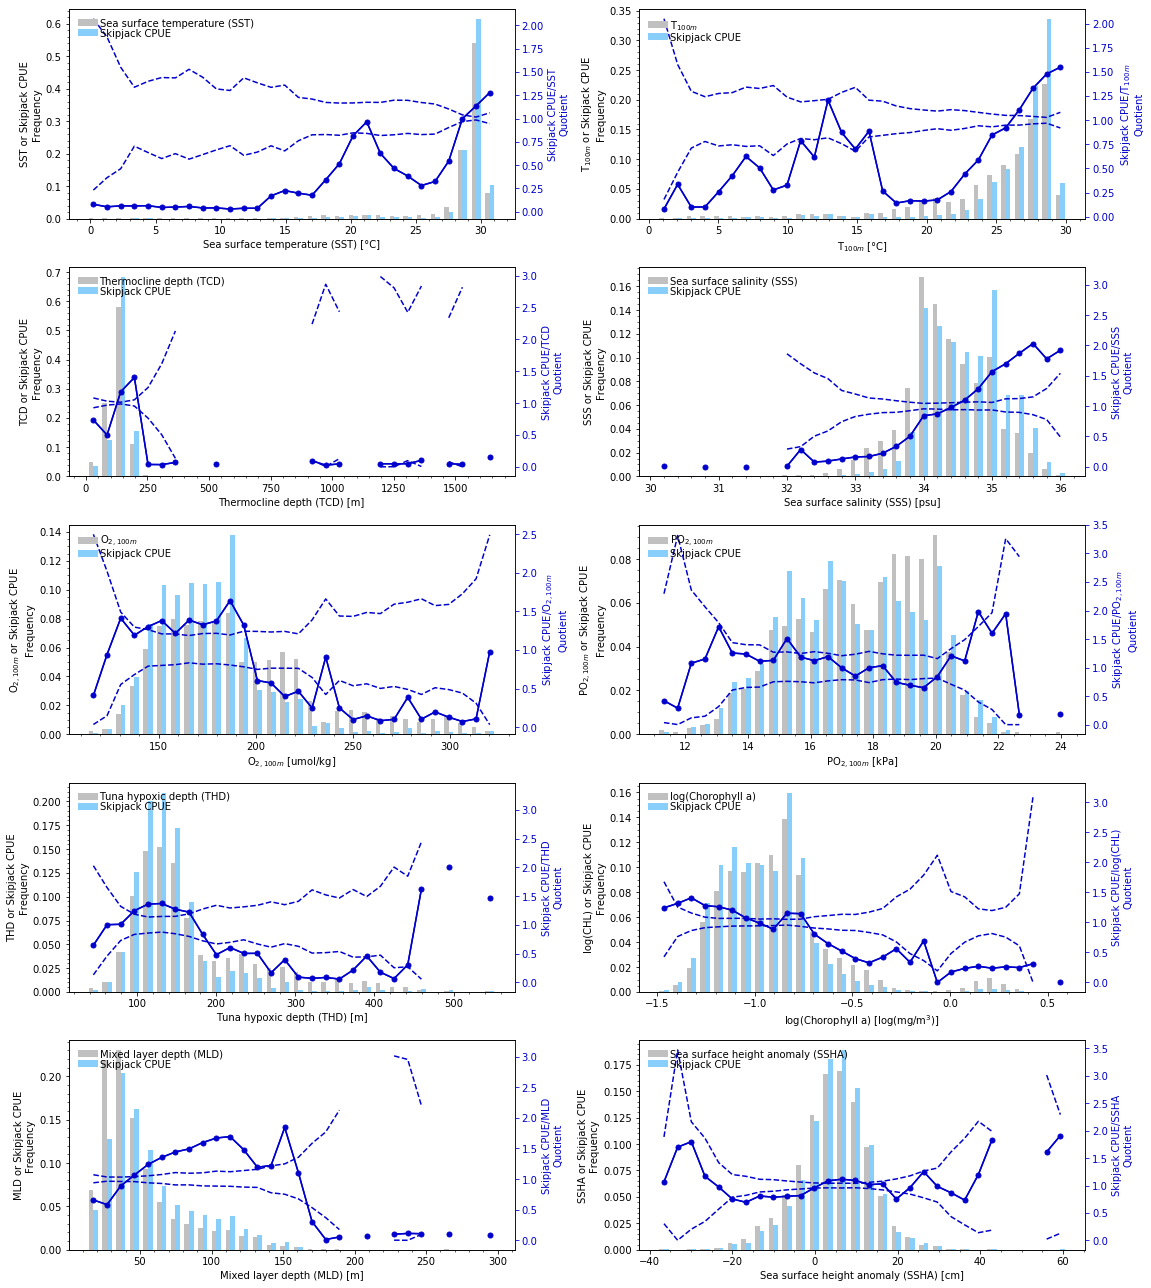

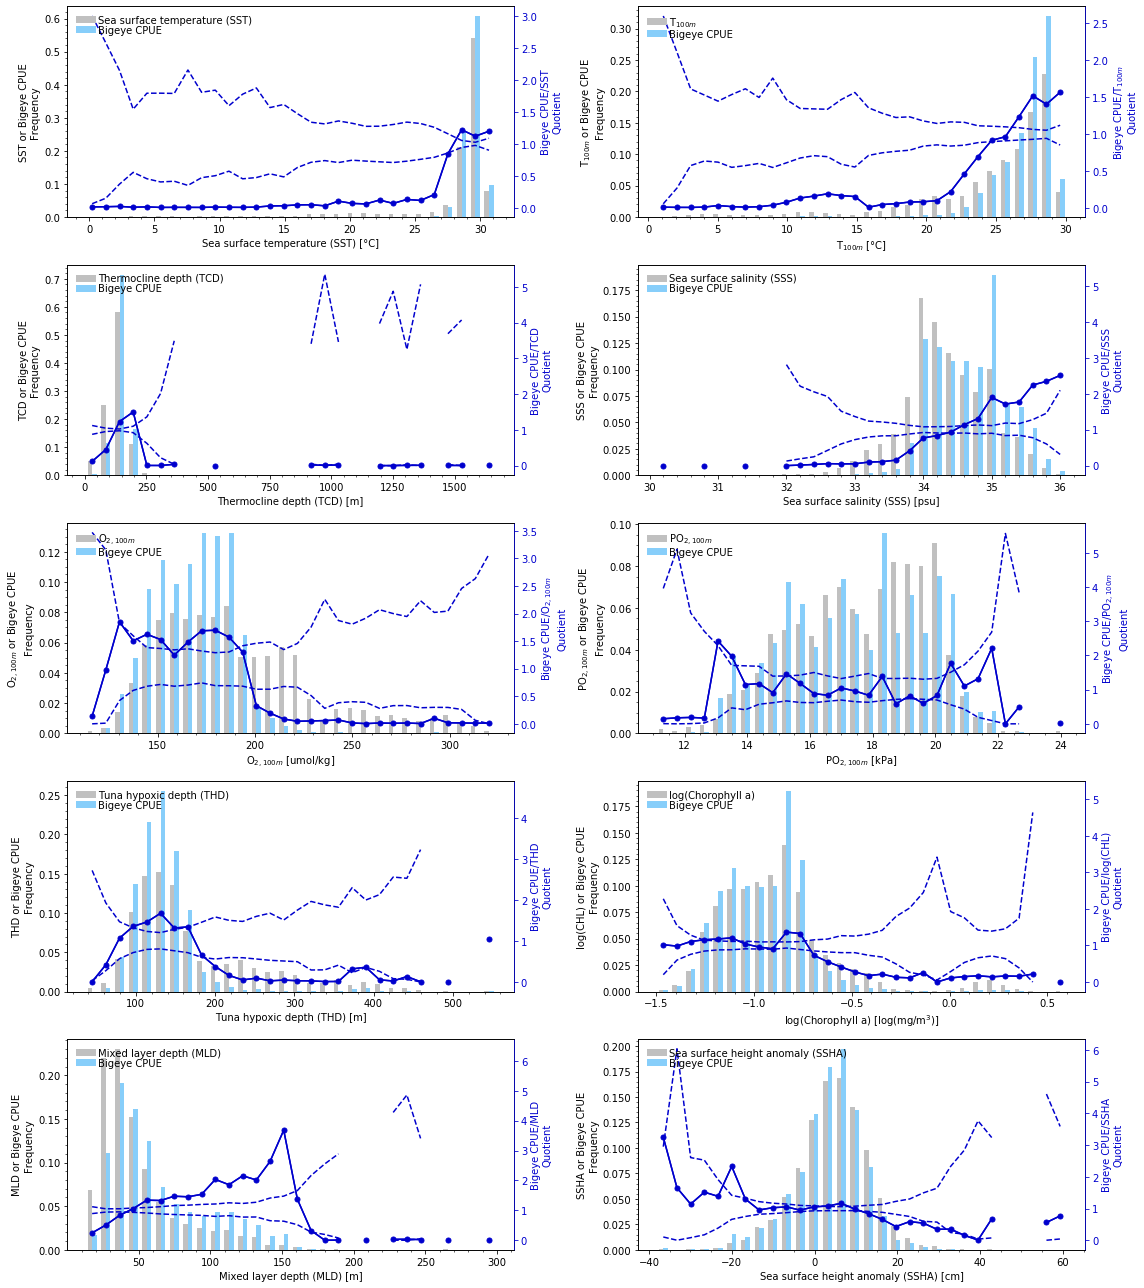

In [22]:
%run figure_notebooks/suppfig4_5.ipynb

### Figure 6

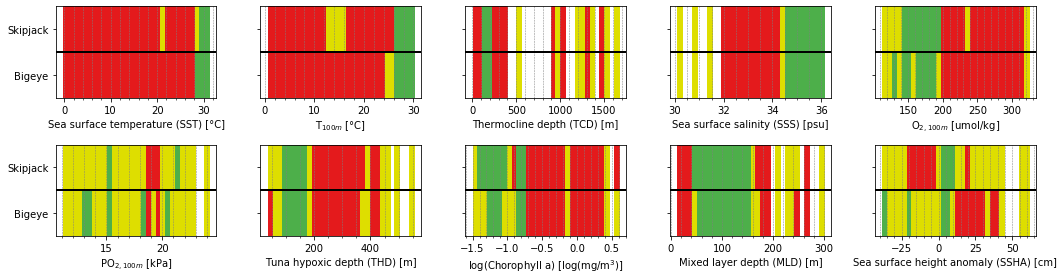

In [23]:
%run figure_notebooks/fig6.ipynb

### Supplementary Figures 6-8

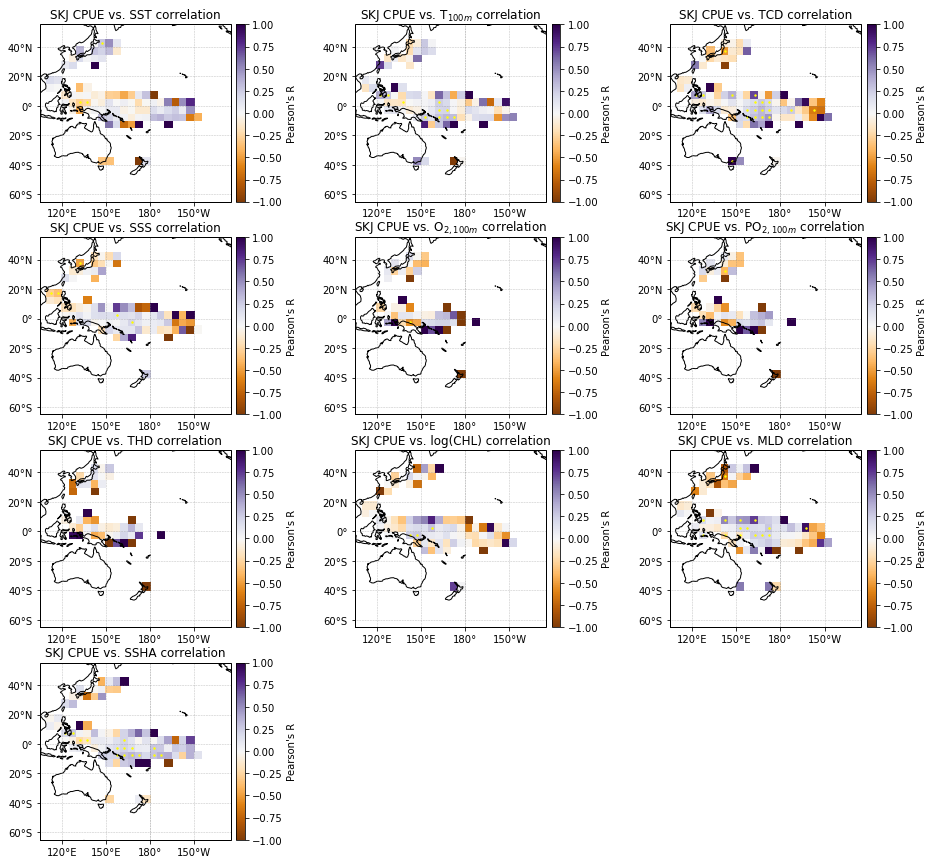

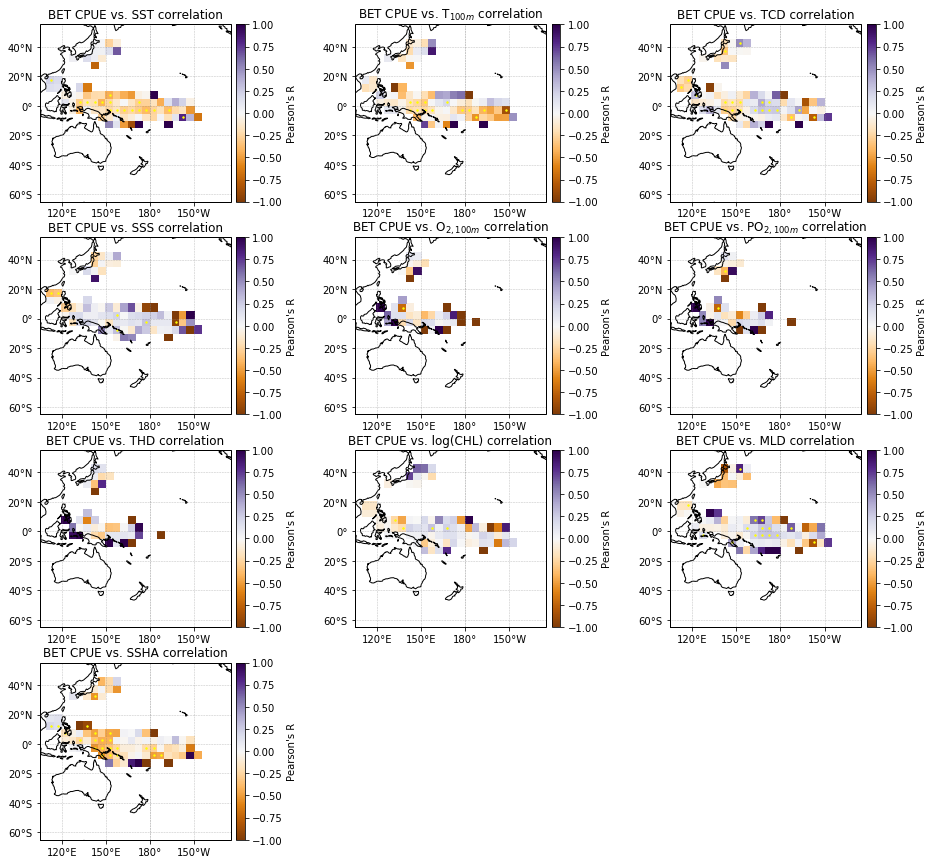

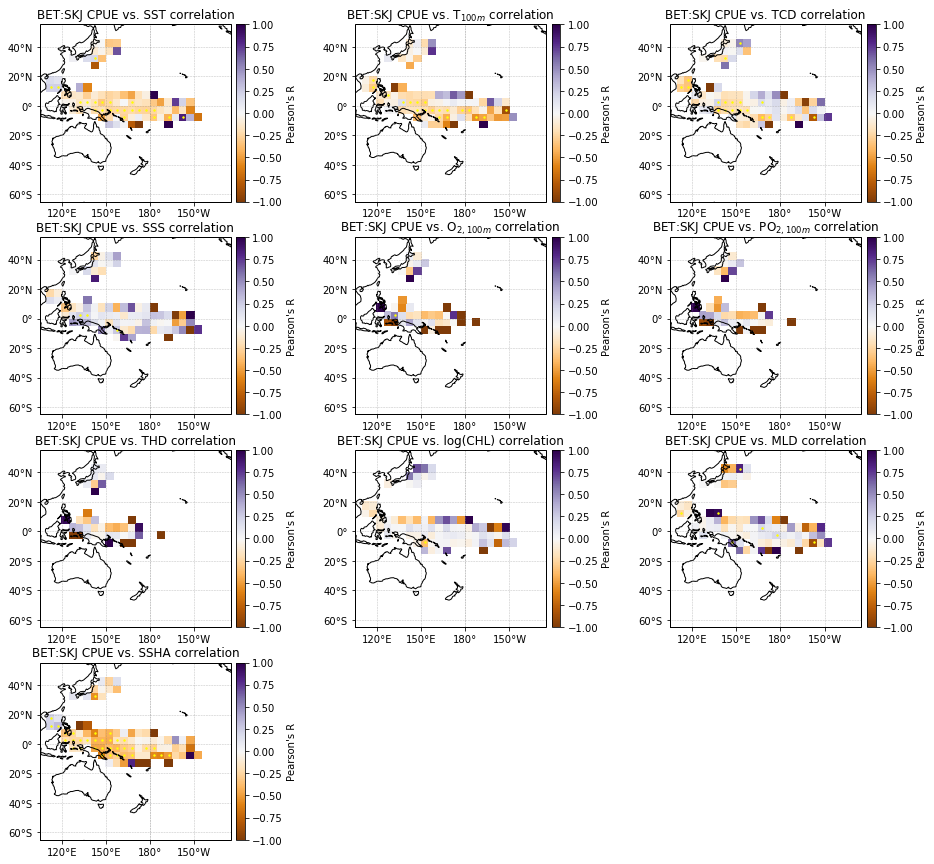

In [24]:
%run figure_notebooks/suppfig6_8.ipynb

### Figure 7

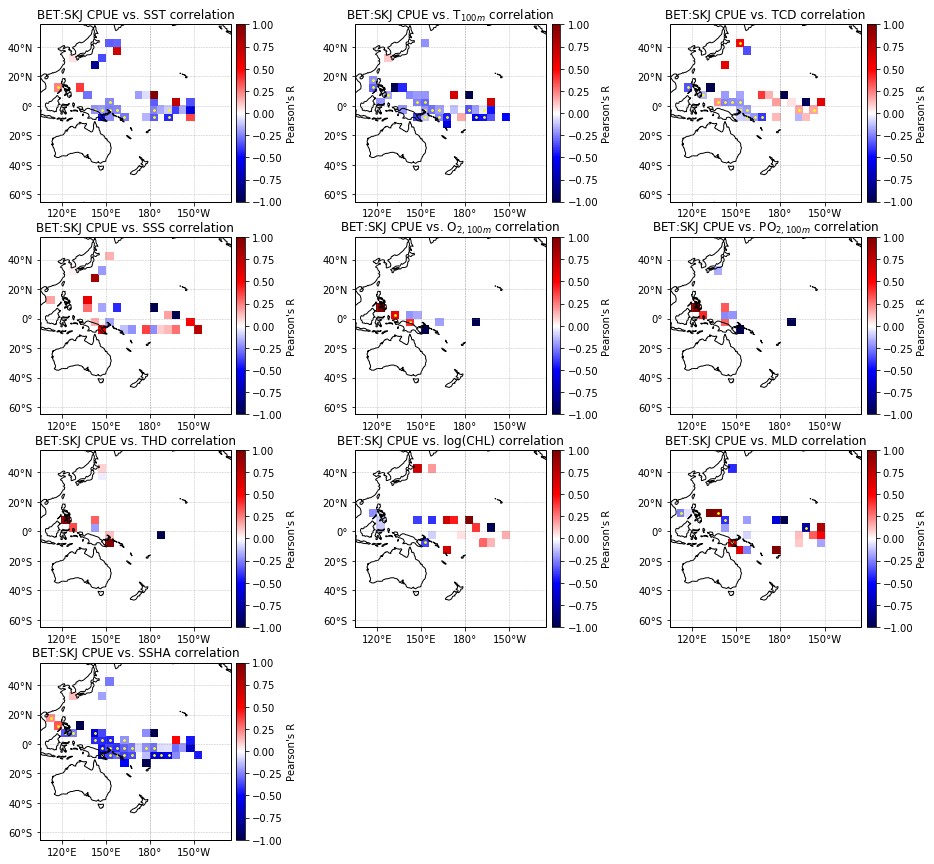

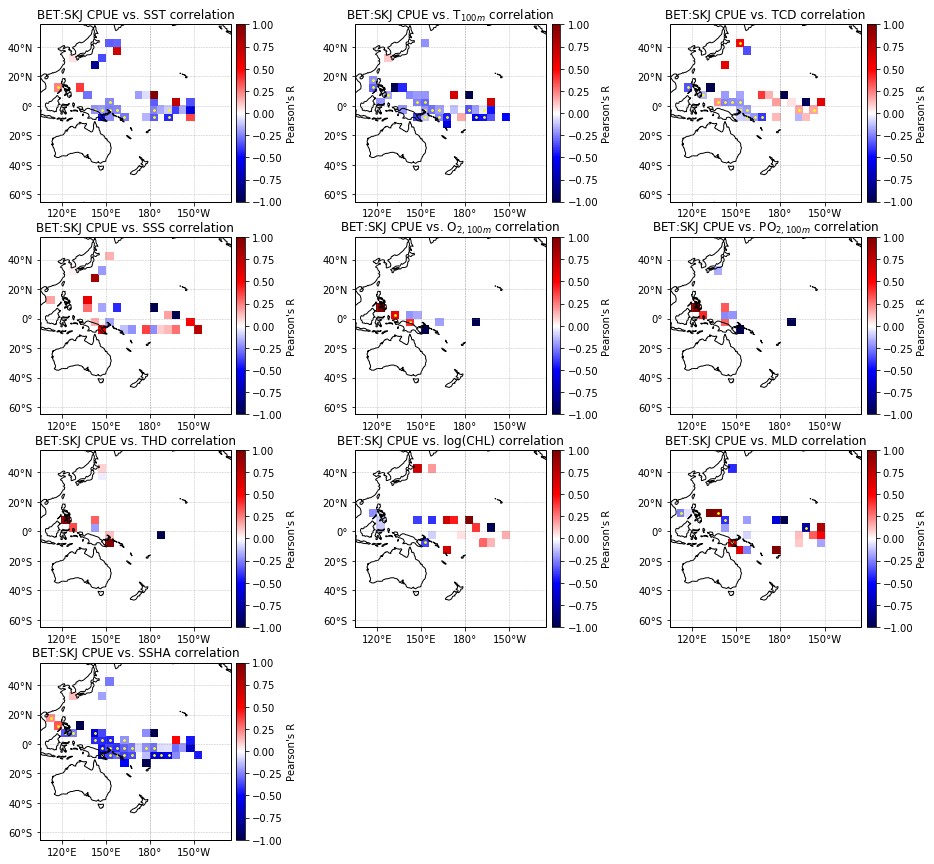

In [25]:
%run figure_notebooks/fig7.ipynb